## BERTTopic Modelling - Transcripts

In [ ]:
!pip install bertopic
!pip install hdbscan[]
!pip install umap-learn

import os
import re
import umap
import hdbscan
import pandas as pd
import seaborn as sns
from bertopic import BERTopic
from google.colab import drive
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile("Path_to_zipfile", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile("Path_to_zipfile", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
import os
directory_paths = [
    '../tmp/csv-files- black mirror',
    '../tmp/csv-files- love death robots']


In [ ]:
all_files = []
for directory_path in directory_paths:
    print(f"Files in {directory_path}:")
    for filename in os.listdir(directory_path):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory_path, filename)
            all_files.append(filepath)
            print(filepath)

if not all_files:
    print("No CSV files found in the specified directories.")
else:
    docs = []
    for file in all_files:
        try:
            df = pd.read_csv(file)
            if 'Text' in df.columns:
                text_column = df['Text'].tolist()
                doc = '\n'.join(text_column) + '\n'
                docs.append(doc)
            else:
                print(f"Warning: 'Text' column not found in {file}. Skipping this file.")
        except pd.errors.EmptyDataError:
            print(f"Warning: {file} is empty. Skipping this file.")
        except Exception as e:
            print(f"An error occurred while processing {file}: {e}")

In [ ]:
import pandas as pd
import os
import math

all_sets= []

for file in all_files:

    if not os.path.exists(file):
        raise FileNotFoundError(f"File not found: {file}")

    data = pd.read_csv(file)
    all_text = list(data['Text'])

    combined_sentences_number = int(math.ceil(len(data)/5))
    combined_text = list()
    number_batches = math.floor(len(all_text)/combined_sentences_number)
    for i in range(number_batches):
      combined_sentence = ' '.join(all_text[i*combined_sentences_number:(i+1)*combined_sentences_number])
      combined_text.append(combined_sentence)

    if len(all_text) % combined_sentences_number != 0:
      combined_sentence = ' '.join(all_text[number_batches*combined_sentences_number:])
      combined_text.append(combined_sentence)

    all_sets.extend(combined_text)

In [ ]:
import re
import math

#Preprocessing
def preprocess(text):
    """
    Cleans the input text by:
        - Removing non-alphabetic characters.
        - Converting to lowercase.
        - Removing extra spaces.
    Args:
        text: The input text string.
    Returns:
        The cleaned text string if it has at least 3 characters,
        otherwise an empty string.

    """
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    cleaned_text = cleaned_text.lower()
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text if len(cleaned_text) > 2 else ""

cleaned_docs = [preprocess(text) for text in all_sets if len(preprocess(text).strip()) > 0]
print(f"Number of documents after cleaning: {len(cleaned_docs)}")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Custom stopwords
custom_stopwords = ["a", "able", "about", "above", "according", "accordingly", "across", "actually", 'i', 'you','to', 'it', 'the','no', "a", "able", "about", "above", "according", "accordingly", "across", "actually", "after", "afterwards", "again", "against", "all", "allow", "allows", "almost","alone", "along", "already", "also", "although", "always", "am", "among",
    "amongst", "an", "and", "another", "any", "anybody", "anyhow", "anyone","anything", "anyway", "anyways", "anywhere", "apart", "appear", "appreciate","appropriate", "are", "around", "as", "aside", "ask", "asking", "associated",
    "at", "available", "away", "awfully", "b", "be", "became", "because", "become","becomes", "becoming", "been", "before", "beforehand", "behind", "being","believe", "below", "beside", "besides", "best", "better", "between", "beyond",
    "both", "brief", "but", "by", "c", "came", "can", "cannot", "cant", "cause","causes", "certain", "certainly", "changes", "clearly", "co", "com", "come","comes", "concerning", "consequently", "consider", "considering", "contain",
    "containing", "contains", "corresponding", "could", "course", "currently", "d","definitely", "described", "despite", "did", "different", "do", "does", "doing","done", "down", "downwards", "during", "e", "each", "edu", "eg", "eight",
    "either", "else", "elsewhere", "enough", "entirely", "especially", "et", "etc","even", "ever", "every", "everybody", "everyone", "everything", "everywhere","ex", "exactly", "example", "except", "f", "far", "few", "fifth", "first",
    "five", "followed", "following", "follows", "for", "former", "formerly","forth", "four", "from", "further", "furthermore", "g", "get", "gets", "getting","given", "gives", "go", "goes", "going", "gone", "got", "gotten", "greetings",
    "h", "had", "happens", "hardly", "has", "have", "having", "he", "hello", "help","hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers","herself", "hi", "him", "himself", "his", "hither", "hopefully", "how", "howbeit",
    "however", "i", "ie", "if", "ignored", "immediate", "in", "inasmuch", "inc","indeed", "indicate", "indicated", "indicates", "inner", "insofar", "instead",
    "into", "inward", "is", "it", "its", "itself", "j", "just", "k", "keep", "keeps","kept", "know", "knows", "known", "l", "last", "lately", "later", "latter",
    "latterly", "least", "less", "lest", "let", "like", "liked", "likely", "little","look", "looking", "looks", "ltd", "m", "mainly", "many", "may", "maybe", "me",
    "mean", "meanwhile", "merely", "might", "more", "moreover", "most", "mostly","much", "must", "my", "myself", "n", "name", "namely", "nd", "near", "nearly",
    "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next","nine", "no", "nobody", "non", "none", "noone", "nor", "normally", "not",
    "nothing", "novel", "now", "nowhere", "o", "obviously", "of", "off", "often","oh", "ok", "okay", "old", "on", "once", "one", "ones", "only", "onto", "or",
    "other", "others", "otherwise", "ought", "our", "ours", "ourselves", "out","outside", "over", "overall", "own", "p", "particular", "particularly", "per",
    "perhaps", "placed", "please", "plus", "possible", "presumably", "probably","provides", "q", "que", "quite", "qv", "r", "rather", "rd", "re", "really",
    "reasonably", "regarding", "regardless", "regards", "relatively","respectively", "right", "s", "said", "same", "saw", "say", "saying", "says",
    "second", "secondly", "see", "seeing", "seem", "seemed", "seeming", "seems","seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven",
    "several", "shall", "she", "should", "since", "six", "so", "some", "somebody","somewhere", "soon", "sorry", "specified", "specify", "specifying", "still",
    "sub", "such", "sup", "sure", "t", "take", "taken", "tell", "tends", "th","than", "thank", "thanks", "thanx", "that", "thats", "the", "their", "theirs",
    "them", "themselves", "then", "thence", "there", "thereafter", "thereby","therefore", "therein", "theres", "thereupon", "these", "they", "think",
    "third", "this", "thorough", "thoroughly", "those", "though", "three","through", "throughout", "thru", "thus", "to", "together", "too", "took",
    "toward", "towards", "tried", "tries", "truly", "try", "trying", "twice","two", "u", "un", "under", "unfortunately", "unless", "unlikely", "until",
    "unto", "up", "upon", "us", "use", "used", "useful", "uses", "using","usually", "uucp", "v", "value", "various", "very", "via", "viz", "vs", "w",
    "want", "wants", "was", "way", "we", "welcome", "well", "went", "were","what", "whatever", "when", "whence", "whenever", "where", "whereafter",
    "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which","while", "whither", "who", "whoever", "whole", "whom", "whose", "why",
    "will", "willing", "wish", "with", "within", "without", "wonder", "would","x", "y", "yes", "yet", "you", "your", "yours", "yourself", "yourselves",
    "z", "zero",'im', 'yeah','dont', 'hey','youre', 'episode','hes','shes','1','3','man','no','no.','♪','um','oh! oh! shit!','uh','ive','good', 'hang the dj ♪','♪ hang the dj, hang the dj','Sonnies Edge','Three Robots','The Witness',"Suits", "Sucker of Souls", "When the Yogurt Took Over", "Beyond the Aquila Rift",
    "Good Hunting", "The Dump", "Shape-Shifters", "Helping Hand", "Fish Night",
    "Lucky 13", "Zima Blue", "Blindspot", "Ice Age", "Alternate Histories",
    "The Secret War", "Automated Customer Service", "Ice", "Pop Squad",
    "Snow in the Desert", "The Tall Grass", "All Through the House", "Life Hutch",
    "The Drowned Giant", "Three Robots: Exit Strategies", "Bad Travelling",
    "The Very Pulse of the Machine", "Night of the Mini Dead", "Kill Team Kill",
    "Swarm", "Mason's Rats", "In Vaulted Halls Entombed", "Jibaro",  "The National Anthem", "Fifteen Million Merits", "The Entire History of You",
    "Be Right Back", "White Bear", "The Waldo Moment", "White Christmas",
    "Nosedive", "Playtest", "Shut Up and Dance", "San Junipero", "Men Against Fire",
    "Hated in the Nation", "USS Callister", "Arkangel", "Crocodile", "Hang the DJ",
    "Metalhead", "Black Museum", "Striking Vipers", "Smithereens",
    "Rachel, Jack and Ashley Too", "Joan Is Awful", "Loch Henry", "Beyond the Sea",
    "Mazey Day", "Demon 79"]

# Tokenizing
def custom_tokenizer(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    return [token for token in tokens if token not in custom_stopwords]

docs = [doc.lower() for doc in cleaned_docs]

#TfidfVectorizer
vectorizer_model = TfidfVectorizer(
    min_df=1,
    tokenizer=custom_tokenizer
)



In [ ]:
#UMAP
from umap import UMAP
umap_model = UMAP(n_neighbors=13, n_components=5, metric='cosine', random_state=42)

# BERTopic
topic_model = BERTopic(vectorizer_model=vectorizer_model, umap_model=umap_model, nr_topics=8, min_topic_size=10, verbose=True)

topics, probs = topic_model.fit_transform(docs)


topic_info = topic_model.get_topic_info()
print("Topic Info:")
print(topic_info)

for topic in topic_info['Topic']:
    if topic != -1:
        print(f"Top words for topic {topic}:")
        print(topic_model.get_topic(topic))

In [ ]:
#HDBSCAN
embedding_model = SentenceTransformer("all-mpnet-base-v2")
embeddings = embedding_model.encode(docs)

clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=2, gen_min_span_tree=True)
hdbscan_labels = clusterer.fit_predict(embeddings)

for i, label in enumerate(hdbscan_labels):
    print(f"Document {i}: Cluster {label}")

In [ ]:
topic_info = topic_model.get_topic_info()
print("Topic Info:")
print(topic_info)

for topic in topic_info['Topic']:
    if topic != -1:
        print(f"Top words for topic {topic}:")
        print(topic_model.get_topic(topic))

In [ ]:
embedding_model = SentenceTransformer("all-mpnet-base-v2")

topic_model.visualize_documents(docs=docs,
                                embeddings=embedding_model.encode(docs),
                                hide_annotations=True)


In [ ]:
#Similarity Matrix
topic_model.visualize_distribution(probs)

topic_model.visualize_barchart()

topic_model.visualize_topics()
topic_model.visualize_heatmap()

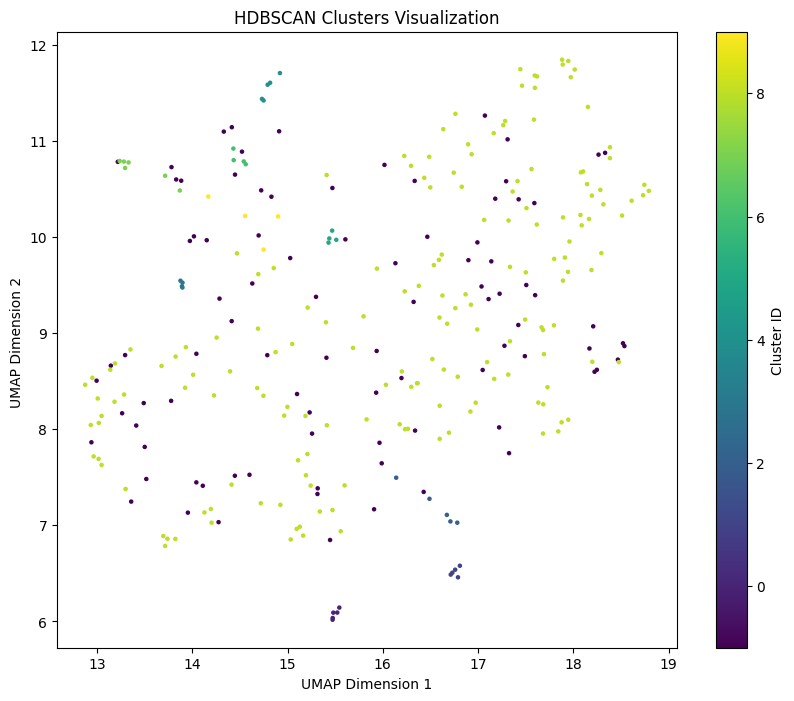

In [ ]:
#Umap
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embeddings_2d = reducer.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=hdbscan_labels, cmap='viridis', s=5)
plt.title('HDBSCAN Clusters Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2 ' )
plt.colorbar(label='Cluster ID')
plt.show()